## Import de bibliotecas necessárias para o funcionamento do script

In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Importação dos dados contidos na mesma pasta e construção dos nós com seus respectivos valores 

In [71]:
dados_para_conversao_urbano = pd.read_excel('salvador-series-finais.xlsx', engine="openpyxl", sheet_name="Rural")

G = nx.Graph()

for (index, item) in dados_para_conversao_urbano.iterrows():
    G.add_node(item[1], 
               Nome_da_Escola=item[1],
               Nome_do_Municipio=item[2],
               Tipo_de_dependencia_administrativa=item[3],
               Tipo_de_Localizacao=item[4],
               Quantidade_de_alunos=item[5],
               INSE_Valor_Absoluto=item[6],
               INSE_Classificação=item[7],
               Subgrupo=item[8],
               Proficiencia_em_Matematica=item[9],
               Nivel_de_proficiência_em_Matematica=item[10],
               Proficiencia_em_Lingua_Portuguesa=item[11],
               Nivel_de_proficiencia_em_Lingua_Portuguesa=item[12],
               IDEB=item[13],
               Indicador_de_Rendimento=item[14],
               Taxa_de_Aprovacao=item[15],
               Taxa_de_Reprovacao=item[16],
               Taxa_de_Abandono=item[17],
               Projecao=item[18],
               Atingiu_ou_nao_a_projeção=item[18],
               COMBINACAO=item[19] 
              
    )

## Construção de arestas baseados nas igualdades de combinação e subgrupo e adicionando-as ao objeto com os nós

In [72]:
edges = []
for (index, item) in dados_para_conversao_urbano.iterrows():
    for index2, item2 in dados_para_conversao_urbano.iterrows():
        if(item['Código da Escola'] != item2['Código da Escola']):
            quantidade_de_associacoes = 0
            
            if(item['Combinação'] == item2['Combinação']):
                quantidade_de_associacoes = quantidade_de_associacoes+1

            if(item['Subgrupos'] == item2['Subgrupos']):
                quantidade_de_associacoes = quantidade_de_associacoes+1

            if(quantidade_de_associacoes > 0):
                e = ((item[1]), (item2[1]), quantidade_de_associacoes)
                edges.append(e)

G.add_weighted_edges_from(edges)


## Construção de arquivo .gefx para uso no retina

In [73]:
nx.write_gexf(G, 'item.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

## Celula opicional para visualização prévia da rede

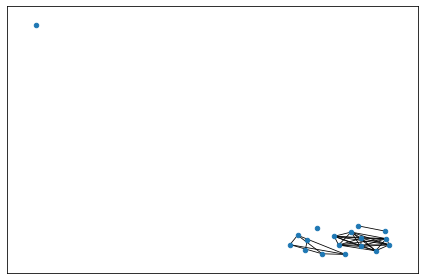

In [74]:

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=20)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=.8)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)


ax = plt.gca()
ax.margins(0.08)
plt.axis("on")
plt.tight_layout()
plt.show()